In [2]:
#Setting It Up
#I collected all of the data above and combined them into one dataframe. The code and details are located here. One challenge was the periodicity of the various features. Our exchange data is daily, some data is monthly, and others quarterly. For our daily exchange rates, I took the last value of each month. For the quarterly data, I copied the quarterly value to each month in that quarter. This gives us a dataframe of monthly data that is easier to work with.
#First, we will import the libraries we will be using and also load our data into a Pandas dataframe.

# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn

# Python magic to show plots inline in the notebook
%matplotlib inline
plt.style.use('ggplot')
import datetime as dt
from datetime import datetime
import math


In [ ]:
# Import data
df = pd.read_csv("C:/Users/Kingsley/Desktop/datacar/allcars.csv")

C:\Users\Kingsley\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [211]:
print(df)

            USDNGN    Year  Month         M2   CPI
Date                                              
11-Jul-95   82.250  2003.0    1.0  1746192.1  10.6
12-Jul-95   82.750  2003.0    2.0  1778660.2   7.3
13-Jul-95   83.000  2003.0    3.0  1918925.7   5.9
14-Jul-95   83.250  2003.0    4.0  1966190.1   8.3
17-Jul-95   83.750  2003.0    5.0  1857919.5   8.7
18-Jul-95   83.750  2003.0    6.0  2124315.7  14.0
19-Jul-95   83.250  2003.0    7.0  1952426.1  12.9
20-Jul-95   83.250  2003.0    8.0  1972619.0  12.4
21-Jul-95   82.575  2003.0    9.0  1981068.5  18.4
25-Jul-95   83.500  2003.0   10.0  2071969.0  23.6
26-Jul-95   83.500  2003.0   11.0  2079576.6  21.3
27-Jul-95   84.550  2003.0   12.0  1985191.8  23.8
28-Jul-95   84.750  2004.0    1.0  1917503.4  22.4
31-Jul-95   83.950  2004.0    2.0  2062656.1  24.8
1-Aug-95    84.200  2004.0    3.0  2106238.6  22.5
2-Aug-95    84.150  2004.0    4.0  2089655.8  17.5
3-Aug-95    84.100  2004.0    5.0  2105957.6  19.8
4-Aug-95    84.150  2004.0    6

In [212]:
#FEATURE ENGINEERING
#Feature Engineering
#Currently our dataframe isn’t exactly what we need. This is because our machine learning algorithms only learn row by row and aren’t aware of other rows when learning or making predictions. We can overcome this challenge by imputing previous time value, or lags, into our data.
#After some trial and error, I determined that 4 lags (or 4 months) work best. The code below creates a function that will create 4 lags for each feature in the ‘features’ list. Our new dataframe now has 41 columns!

# Define custom function to create lag values
def feature_lag(features):
    for feature in features:
        df[feature + '-lag1'] = df[feature].shift(1)
        df[feature + '-lag2'] = df[feature].shift(2)
        df[feature + '-lag3'] = df[feature].shift(3)
        df[feature + '-lag4'] = df[feature].shift(4)

# Define columns to create lags for
features = ['USDNGN', 'M2', 'CPI', 'Month']

# Call custom function
feature_lag(features)

In [213]:
#You can see that “lag1” has the previous day/months value, “lag2” and two days/months previous, and so on. This gives the algorithm some knowledge of the previous value.
#Next we can add the year-month and day into the column. This gives the model a “sense” of time 'reality' over abstract numbers.
#df['USDNGN'] = df.USDNGN.fillna(method='ffill')
#df['USDNGN_1'] = df.USDNGN_1.fillna(method='ffill')
#df['USDNGN_2'] = df.USDNGN_2.fillna(method='ffill')
#df['USDNGN_3'] = df.USDNGN_3.fillna(method='ffill')
#df['CPI'] = df.CPI.fillna(value=0)
#df['CPI_1'] = df.CPI_1.fillna(value=0)
#df['CPI_2'] = df.CPI_2.fillna(value=0)
#df['CPI_3'] = df.CPI_3.fillna(value=0)
df.describe()

,USDNGN,Year,Month,M2,CPI,USDNGN-lag1,USDNGN-lag2,USDNGN-lag3,USDNGN-lag4,M2-lag1,...,M2-lag3,M2-lag4,CPI-lag1,CPI-lag2,CPI-lag3,CPI-lag4,Month-lag1,Month-lag2,Month-lag3,Month-lag4
count,6494.000000,209.000000,209.000000,2.090000e+02,209.000000,6493.000000,6492.000000,6491.000000,6490.000000,2.090000e+02,...,2.090000e+02,2.090000e+02,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,159.895813,2011.215311,6.416268,1.329070e+07,11.961579,159.861722,159.830816,159.799901,159.768977,1.329070e+07,...,1.329070e+07,1.329070e+07,11.961579,11.961579,11.961579,11.961579,6.416268,6.416268,6.416268,6.416268
std,72.928523,5.043708,3.467420,8.525487e+06,4.264771,72.882372,72.845423,72.808432,72.771397,8.525487e+06,...,8.525487e+06,8.525487e+06,4.264771,4.264771,4.264771,4.264771,3.467420,3.467420,3.467420,3.467420
min,74.900000,2003.000000,1.000000,1.746192e+06,3.000000,74.900000,74.900000,74.900000,74.900000,1.746192e+06,...,1.746192e+06,1.746192e+06,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,114.862500,2007.000000,3.000000,5.052863e+06,9.000000,114.850000,114.812500,114.775000,114.737500,5.052863e+06,...,5.052863e+06,5.052863e+06,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,3.000000,3.000000
50%,133.250000,2011.000000,6.000000,1.238927e+07,11.380000,133.250000,133.250000,133.250000,133.250000,1.238927e+07,...,1.238927e+07,1.238927e+07,11.380000,11.380000,11.380000,11.380000,6.000000,6.000000,6.000000,6.000000
75%,162.653750,2016.000000,9.000000,2.002983e+07,14.000000,162.650000,162.650000,162.650000,162.650000,2.002983e+07,...,2.002983e+07,2.002983e+07,14.000000,14.000000,14.000000,14.000000,9.000000,9.000000,9.000000,9.000000
max,381.250000,2020.000000,12.000000,3.249053e+07,28.200000,372.250000,372.250000,372.250000,372.250000,3.249053e+07,...,3.249053e+07,3.249053e+07,28.200000,28.200000,28.200000,28.200000,12.000000,12.000000,12.000000,12.000000


In [214]:
#Finally, we can take the difference between the current and lag exchange rates. By itself the algorithm isn’t able to reach these sorts of conclusions, so we can calculate this and add it to our dataframe as well.

df['USDNGN-lag1-diff'] = df['USDNGN'] - df['USDNGN-lag1']
df['USDNGN-lag2-diff'] = df['USDNGN-lag1'] - df['USDNGN-lag2']
df['USDNGN-lag3-diff'] = df['USDNGN-lag2'] - df['USDNGN-lag3']

In [215]:
df['y3'] = df.USDNGN.shift(-3)
df['y6'] = df.USDNGN.shift(-6)
df['y12'] = df.USDNGN.shift(-12)

In [217]:
df.isnull().values.any()

True

In [218]:
df = df.dropna(axis=0,subset=['USDNGN', 'Year', 'Month', 'M2', 'CPI', 'USDNGN-lag1', 'USDNGN-lag2',
       'USDNGN-lag3', 'USDNGN-lag4', 'M2-lag1', 'M2-lag2', 'M2-lag3',
       'M2-lag4', 'CPI-lag1', 'CPI-lag2', 'CPI-lag3', 'CPI-lag4', 'Month-lag1',
       'Month-lag2', 'Month-lag3', 'Month-lag4', 'USDNGN-lag1-diff',
       'USDNGN-lag2-diff', 'USDNGN-lag3-diff', 'y3', 'y6', 'y12'])

In [219]:
print(df)

           USDNGN    Year  Month           M2    CPI  USDNGN-lag1  \
Date                                                                
17-Jul-95  83.750  2003.0    5.0   1857919.50   8.70       83.250   
18-Jul-95  83.750  2003.0    6.0   2124315.70  14.00       83.750   
19-Jul-95  83.250  2003.0    7.0   1952426.10  12.90       83.750   
20-Jul-95  83.250  2003.0    8.0   1972619.00  12.40       83.250   
21-Jul-95  82.575  2003.0    9.0   1981068.50  18.40       83.250   
25-Jul-95  83.500  2003.0   10.0   2071969.00  23.60       82.575   
26-Jul-95  83.500  2003.0   11.0   2079576.60  21.30       83.500   
27-Jul-95  84.550  2003.0   12.0   1985191.80  23.80       83.500   
28-Jul-95  84.750  2004.0    1.0   1917503.40  22.40       84.550   
31-Jul-95  83.950  2004.0    2.0   2062656.10  24.80       84.750   
1-Aug-95   84.200  2004.0    3.0   2106238.60  22.50       83.950   
2-Aug-95   84.150  2004.0    4.0   2089655.80  17.50       84.200   
3-Aug-95   84.100  2004.0    5.0  

Text(0.5,1,'Correlation Heatmap of Numeric Features')

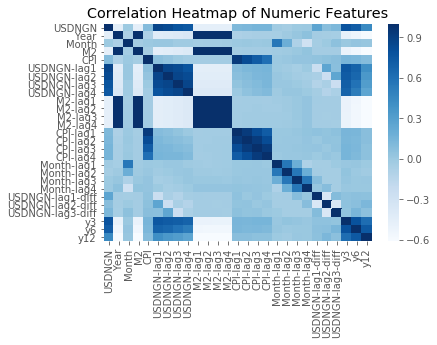

In [220]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features')

#The very light and very dark boxes show a strong positive or negative correlation between the features. A positive correlation would be that as the USDNGN exchange rate increases (the currency depreciates) the other feature increases as well. A negative correlation is the opposite. As the exchange rate rises the other features decreases.
#We are particularly interested in correlations to the USD feature. M2 and Inflation and currency have strong correlations but does not prove a causal relationship.

In [221]:
#Make final dataset
df.columns

Index(['USDNGN', 'Year', 'Month', 'M2', 'CPI', 'USDNGN-lag1', 'USDNGN-lag2',
       'USDNGN-lag3', 'USDNGN-lag4', 'M2-lag1', 'M2-lag2', 'M2-lag3',
       'M2-lag4', 'CPI-lag1', 'CPI-lag2', 'CPI-lag3', 'CPI-lag4', 'Month-lag1',
       'Month-lag2', 'Month-lag3', 'Month-lag4', 'USDNGN-lag1-diff',
       'USDNGN-lag2-diff', 'USDNGN-lag3-diff', 'y3', 'y6', 'y12'],
      dtype='object')

In [222]:
cols = df.columns.tolist()

In [223]:
df.to_csv('m+fdata.csv')

In [224]:
df.dtypes

USDNGN              float64
Year                float64
Month               float64
M2                  float64
CPI                 float64
USDNGN-lag1         float64
USDNGN-lag2         float64
USDNGN-lag3         float64
USDNGN-lag4         float64
M2-lag1             float64
M2-lag2             float64
M2-lag3             float64
M2-lag4             float64
CPI-lag1            float64
CPI-lag2            float64
CPI-lag3            float64
CPI-lag4            float64
Month-lag1          float64
Month-lag2          float64
Month-lag3          float64
Month-lag4          float64
USDNGN-lag1-diff    float64
USDNGN-lag2-diff    float64
USDNGN-lag3-diff    float64
y3                  float64
y6                  float64
y12                 float64
dtype: object

In [225]:
#Split into Training and Test Data
#Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

y = df['USDNGN']

In [226]:
X = df.drop(['USDNGN'], axis=1)

In [227]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [228]:
X_train.shape, y_train.shape

((143, 26), (143,))

In [229]:
X_test.shape, y_test.shape

((62, 26), (62,))

In [230]:
X.columns

Index(['Year', 'Month', 'M2', 'CPI', 'USDNGN-lag1', 'USDNGN-lag2',
       'USDNGN-lag3', 'USDNGN-lag4', 'M2-lag1', 'M2-lag2', 'M2-lag3',
       'M2-lag4', 'CPI-lag1', 'CPI-lag2', 'CPI-lag3', 'CPI-lag4', 'Month-lag1',
       'Month-lag2', 'Month-lag3', 'Month-lag4', 'USDNGN-lag1-diff',
       'USDNGN-lag2-diff', 'USDNGN-lag3-diff', 'y3', 'y6', 'y12'],
      dtype='object')

In [231]:
###Decision Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [258]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [259]:
regr_rf.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [233]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.753935419454362

In [261]:
decision_forest_score = regr_rf.score(X_train, y_train)
decision_forest_score

0.7553345984667945

In [234]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [235]:
from math import sqrt
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 0.49
Mean absolute error: 0.35
R-squared: 0.75


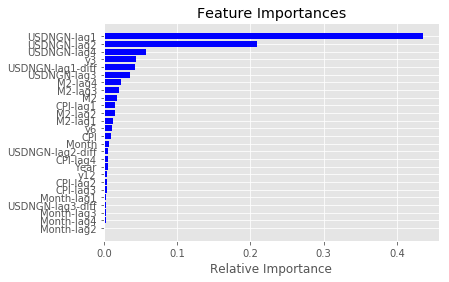

In [236]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()



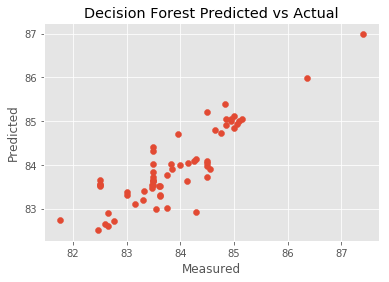

In [237]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

In [238]:
#Extra Trees Regression

from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [239]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [240]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.7743722864503655

In [262]:
extratree_score = extra_tree.score(X_train, y_train)
extratree_score

1.0

In [241]:
extratree_pred = extra_tree.predict(X_test)

In [264]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, extratree_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, extratree_pred))

Root mean squared error: 0.47
Mean absolute error: 0.32
R-squared: 0.77


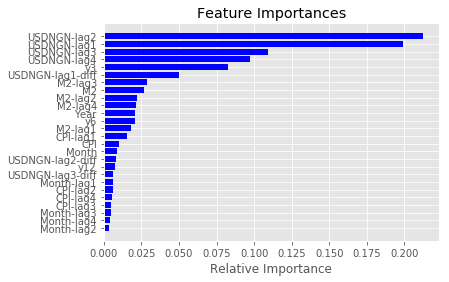

In [243]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

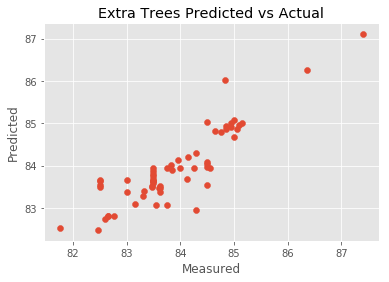

In [244]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

In [245]:
#Decision Tree + AdaBoost

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Decision Tree Regressor object
tree_1 = DecisionTreeRegressor()

tree_2 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, learning_rate=.1)

In [246]:
# Train the model using the training sets
tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=200,
         random_state=None)

In [247]:
# Score the decision tree model
tree_1.score(X_test, y_test)

0.58191589521898

In [248]:
# Score the boosted decision tree model
boosted_tree_score = tree_2.score(X_test, y_test)
boosted_tree_score

0.7981040067327165

In [263]:
boosted_tree_score = tree_2.score(X_train, y_train)
boosted_tree_score

0.9999862392982899

In [249]:
# Make predictions using the testing set
tree_1_pred = tree_1.predict(X_test)
tree_2_pred = tree_2.predict(X_test)

In [250]:

# The coefficients

# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, tree_2_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, tree_2_pred))

Root mean squared error: 0.44
Mean absolute error: 0.29
R-squared: 0.80


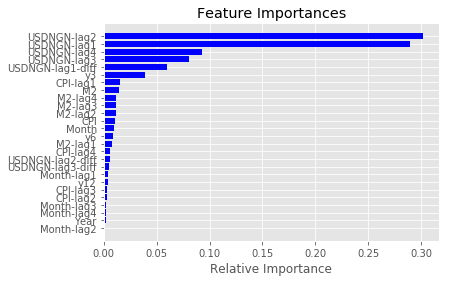

In [251]:
features = X.columns
importances = tree_2.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

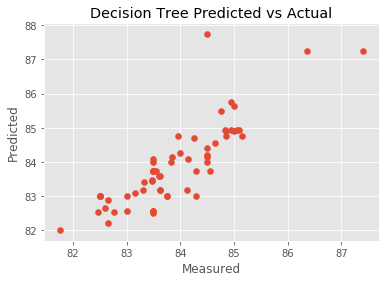

In [252]:
plt.scatter(y_test, tree_1_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')
plt.show()

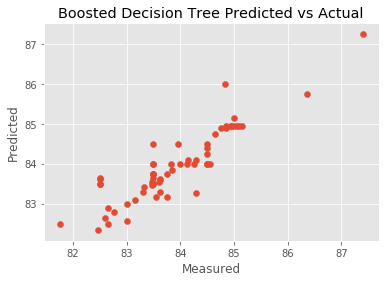

In [253]:
plt.scatter(y_test, tree_2_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Boosted Decision Tree Predicted vs Actual')
plt.show()

In [254]:
#Evaluate Models
print("Scores:")
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("Boosted decision tree score: ", boosted_tree_score)
print("\n")
print("RMSE:")
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
print("Boosted decision tree RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, tree_2_pred)))


Scores:
Decision forest score:  0.753935419454362
Extra Trees score:  0.7743722864503655
Boosted decision tree score:  0.7981040067327165


RMSE:
Decision forest RMSE: 0.49
Extra Trees RMSE: 0.47
Boosted decision tree RMSE: 0.44
